In [3]:
import nltk
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore")
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import pandas as pd

# Problem Statement

In [2]:
#we have to analyse customer review about Hospital Service.


In [4]:
df=pd.read_csv('Dataset-NLP Assignment.csv',encoding='latin-1')
df

,ID,MEMBER_ID,COMMENT
0,a2p1U000000RowfQAC,0011U00000rjFKdQAM,"I showed up for my appointment, but they had m..."
1,a2p1U000000RqQqQAK,0011U00000riCSHQA2,"Staff was polite, courteous, and on time"
2,a2p1U000000RqXyQAK,0011U00000riTw7QAE,Overall care is great! It's wonderful to be a...
3,a2p1U000000Rq1LQAS,0011U00000rhu8eQAA,Like the doctor and staff at this location. Ea...
4,a2p1U000000RpiuQAC,0011U00000rk4SHQAY,The convenience and the doctors
...,...,...,...
3807,a2p1U000000Ro6oQAC,0011U00000ripDZQAY,yes
3808,a2p1U000000l8JgQAI,0011U00000rhynIQAQ,Very skeptical that you will soon be without a...
3809,a2p1U000000RtGrQAK,0011U00000riYJYQA2,"Doctor Malfese is easily accessible, staff is ..."
3810,a2p1U000000RtKVQA0,0011U00000rhsCkQAI,Friendly Staff that can be reached at any time


# EDA

In [5]:
unigram_list = ngrams(df.COMMENT[1].split(),3)

unigram_list

In [6]:
for unigram in unigram_list:
    print(unigram)

('Staff', 'was', 'polite,')
('was', 'polite,', 'courteous,')
('polite,', 'courteous,', 'and')
('courteous,', 'and', 'on')
('and', 'on', 'time')


In [7]:
def ngramlist(df,ngram_range):
#     tokens = data.split()
    ngram_list = ngrams(df,ngram_range)
    ngarms_1 = [ ngram_[0] for  ngram_ in ngram_list]
    return ngarms_1 

In [8]:
unigram_list = df.COMMENT.apply(lambda x : ngramlist(x,1))

In [9]:
final_ngrams = []
for ngram_list in unigram_list:
    final_ngrams.extend(ngram_list)

In [10]:
most_common_unigrams = Counter(final_ngrams).most_common(100)
most_common_unigrams


[(' ', 72780),
 ('e', 41059),
 ('t', 29765),
 ('a', 25244),
 ('o', 25227),
 ('n', 23213),
 ('i', 21411),
 ('s', 18474),
 ('r', 17569),
 ('d', 13329),
 ('h', 13317),
 ('l', 12770),
 ('c', 10324),
 ('m', 8380),
 ('y', 7547),
 ('f', 7157),
 ('u', 7118),
 ('p', 6842),
 ('w', 6359),
 ('.', 5797),
 ('g', 5256),
 ('v', 4808),
 ('I', 3638),
 ('b', 3527),
 ('k', 2960),
 (',', 2154),
 ('T', 1342),
 ('D', 1048),
 ("'", 1013),
 ('E', 834),
 ('A', 727),
 ('S', 710),
 ('x', 699),
 ('N', 604),
 ('C', 593),
 ('O', 516),
 ('Y', 508),
 ('H', 472),
 ('M', 469),
 ('F', 400),
 ('P', 389),
 ('W', 372),
 ('q', 372),
 ('X', 354),
 ('G', 352),
 ('L', 341),
 ('Z', 338),
 ('R', 332),
 ('-', 319),
 ('j', 270),
 ('"', 242),
 ('B', 238),
 ('V', 227),
 ('0', 184),
 ('1', 184),
 ('!', 161),
 ('2', 146),
 ('z', 145),
 ('U', 136),
 (')', 132),
 ('(', 126),
 ('/', 124),
 ('K', 101),
 ('5', 96),
 ('3', 90),
 ('\r', 84),
 ('\n', 84),
 ('Õ', 82),
 ('Q', 81),
 ('4', 74),
 ('J', 55),
 (';', 52),
 (':', 51),
 ('?', 51),
 ('&'

In [11]:
stopword_list = stopwords.words("english")
stopword_list.remove("no")
stopword_list.remove("nor")
stopword_list.remove("not")
def clean_text(df,stopword_list):
    """tokenization,stopwords removal,normalization,punctuations removal, numerical formatremoval,len(word)<2 removal """
    tokens = word_tokenize(df)
    cleantext = [word.lower() for word in tokens if (word not in stopword_list) and ( word not in punctuation) and (word.isalpha()) and (len(word)>2)]
    return cleantext

In [12]:
clean_data = df.COMMENT.apply(lambda x : clean_text(x,stopword_list))
clean_data

0       [showed, appointment, double, booked, get, mee...
1                        [staff, polite, courteous, time]
2       [overall, care, great, wonderful, able, spend,...
3       [like, doctor, staff, location, easy, get, app...
4                             [the, convenience, doctors]
                              ...                        
3807                                                [yes]
3808    [very, skeptical, soon, without, possibly, lon...
3809    [doctor, malfese, easily, accessible, staff, f...
3810                     [friendly, staff, reached, time]
3811    [this, without, doubt, worst, example, patient...
Name: COMMENT, Length: 3812, dtype: object

In [13]:
unigram_list = clean_data.apply(lambda x : ngramlist(x,1))
final_ngrams = []
for ngram_list in unigram_list:
    final_ngrams.extend(ngram_list)
most_common_unigrams = Counter(final_ngrams).most_common(100)

In [14]:
most_common_unigrams

[('doctor', 795),
 ('not', 790),
 ('time', 621),
 ('the', 505),
 ('staff', 482),
 ('get', 475),
 ('appointment', 454),
 ('friendly', 449),
 ('like', 436),
 ('service', 424),
 ('good', 409),
 ('care', 379),
 ('xyz', 326),
 ('great', 316),
 ('easy', 297),
 ('convenient', 290),
 ('office', 282),
 ('would', 263),
 ('visit', 254),
 ('feel', 224),
 ('doctors', 209),
 ('health', 207),
 ('nice', 200),
 ('one', 195),
 ('really', 184),
 ('work', 183),
 ('experience', 171),
 ('see', 166),
 ('call', 157),
 ('appointments', 154),
 ('back', 152),
 ('quick', 149),
 ('wait', 149),
 ('very', 148),
 ('told', 138),
 ('know', 136),
 ('thorough', 135),
 ('patient', 135),
 ('day', 135),
 ('they', 132),
 ('professional', 129),
 ('clinic', 127),
 ('people', 125),
 ('first', 124),
 ('took', 124),
 ('always', 122),
 ('location', 117),
 ('make', 117),
 ('blood', 115),
 ('helpful', 115),
 ('could', 114),
 ('able', 112),
 ('also', 111),
 ('nurse', 109),
 ('never', 108),
 ('new', 108),
 ('need', 106),
 ('phone', 10

In [15]:
def ngramlist(df,ngram_range):
#     tokens = data.split()
    ngram_list = ngrams(df,ngram_range)
    ngarms_1 = [ " ".join(ngram_) for  ngram_ in ngram_list]
    return ngarms_1 

In [16]:
bigram_list = clean_data.apply(lambda x : ngramlist(x,2))
final_ngrams = []
for ngram_list in bigram_list:
    final_ngrams.extend(ngram_list)
most_common_bigrams = Counter(final_ngrams).most_common(100)
most_common_bigrams

[('easy get', 81),
 ('the doctor', 80),
 ('get appointment', 77),
 ('friendly staff', 76),
 ('good service', 70),
 ('feel like', 55),
 ('staff friendly', 50),
 ('the staff', 48),
 ('great service', 47),
 ('took time', 47),
 ('take time', 43),
 ('felt like', 42),
 ('call back', 39),
 ('like doctor', 38),
 ('first visit', 38),
 ('able get', 38),
 ('wait time', 38),
 ('see doctor', 37),
 ('primary care', 36),
 ('customer service', 35),
 ('would recommend', 35),
 ('good experience', 34),
 ('doctor not', 33),
 ('xyz health', 33),
 ('easy schedule', 31),
 ('friendly service', 30),
 ('takes time', 30),
 ('feel rushed', 29),
 ('make appointment', 28),
 ('health care', 28),
 ('convenient location', 27),
 ('first time', 27),
 ('not sure', 26),
 ('would not', 26),
 ('time listen', 26),
 ('easy access', 26),
 ('office staff', 25),
 ('one visit', 24),
 ('easy make', 23),
 ('time spent', 23),
 ('staff nice', 23),
 ('blood work', 22),
 ('phone call', 22),
 ('front desk', 22),
 ('very friendly', 22),


In [17]:
trigram_list = clean_data.apply(lambda x : ngramlist(x,3))
final_ngrams = []
for ngram_list in trigram_list:
    final_ngrams.extend(ngram_list)
most_common_trigrams = Counter(final_ngrams).most_common(100)
most_common_trigrams

[('easy get appointment', 41),
 ('the staff friendly', 13),
 ('great customer service', 11),
 ('doctor took time', 10),
 ('easy make appointments', 10),
 ('took time listen', 10),
 ('primary care doctor', 9),
 ('easy make appointment', 9),
 ('able get appointment', 8),
 ('easy schedule appointment', 8),
 ('get see doctor', 8),
 ('easy get appointments', 8),
 ('primary care physician', 8),
 ('blood work done', 8),
 ('felt like doctor', 8),
 ('take time listen', 8),
 ('time get know', 7),
 ('good customer service', 7),
 ('doctors take time', 7),
 ('the doctor saw', 6),
 ('easy get appt', 6),
 ('time answer questions', 6),
 ('would not recommend', 6),
 ('doctor spent time', 6),
 ('they take time', 6),
 ('very friendly staff', 6),
 ('time spent doctor', 6),
 ('not wait long', 6),
 ('difficult get appointment', 6),
 ('get blood drawn', 6),
 ('the doctor took', 5),
 ('get appointment quickly', 5),
 ('this first visit', 5),
 ('able get day', 5),
 ('time spent patient', 5),
 ('makes feel like'

In [18]:
def wordcloud(df,column):
    df1 = df[column].str.cat(sep=" ") # converted dataframe into string and merged all the reviews 
    text = " ".join([word for word in df1.split()])
    wordcloud = WordCloud(width=700,height=500,background_color="white",min_font_size=10).generate(text)
    plt.figure(figsize=(10,15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

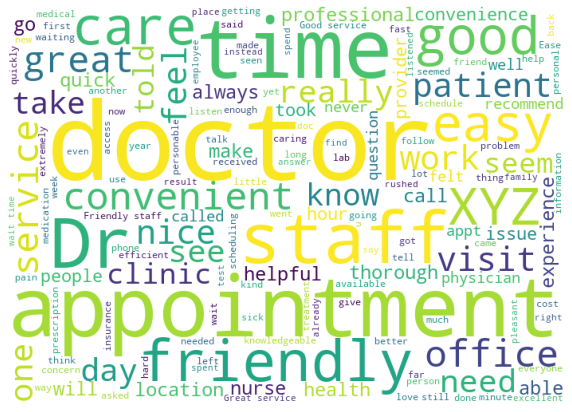

In [19]:
wordcloud(df,'COMMENT')

In [20]:
# if data is unlabeled 
#Text Vectorization

In [21]:
def join_list(df):
    return " ".join(df)
final_data = clean_data.apply(join_list)

In [22]:
# count vectorizer 
count_vect = CountVectorizer()
bow = count_vect.fit_transform(final_data).A
bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# Tfidf 
tfidf_vect = TfidfVectorizer()
tfidf_data = tfidf_vect.fit_transform(final_data).A
tfidf_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
final_data = [sent for sent in clean_data]

In [25]:
word2vec_model  = Word2Vec(final_data,window=5,min_count=2,sg=1) # sg =0 cbow , sg=1 skipgram

In [26]:
word2vec_model.save("word2vec.model")

In [27]:
def vectorizer(list_of_docs,model) :
    rew_vect = []

    for doc in list_of_docs: # iterating over all the reviews
        zero_vector = np.zeros(model.vector_size) # if vector of particular word or review not present we will add zero vector
        vectors =[] # saving vector of each word
        for word in doc :# iterating over all the words
            try :
                vectors.append(model.wv[word]) # appending vector of word
            except KeyError:
                continue
        if vectors :
            vectors = np.asarray(vectors) # converting all vetors of each review in array
            avg_vect = vectors.mean(axis=0) # avarage of all vectors
            rew_vect.append(avg_vect) # apped=nding final vector of review
        else :
            rew_vect.append(zero_vector) # handling Keyerror
    return rew_vect

In [28]:
vectorized_docs = vectorizer(final_data,word2vec_model) 

In [29]:
x_emb = np.array(vectorized_docs)

In [30]:
x_emb

array([[-0.07501067,  0.06986412,  0.00689653, ..., -0.23238486,
         0.13166225, -0.01106888],
       [-0.10375091,  0.07571849, -0.01004561, ..., -0.25283378,
         0.14643326, -0.00811729],
       [-0.07118147,  0.09484562,  0.02305664, ..., -0.23263773,
         0.13216014, -0.00850082],
       ...,
       [-0.0828898 ,  0.08222211,  0.01021975, ..., -0.23912273,
         0.13431562,  0.00254935],
       [-0.12274834,  0.06579719, -0.02645638, ..., -0.30454305,
         0.1678458 , -0.00389605],
       [-0.06857831,  0.09871305,  0.03569646, ..., -0.20646971,
         0.12374833, -0.00305136]])

In [31]:
# kmeans 
def build_kmeans(clusters,df):
    kmeans_model = KMeans(n_clusters=clusters)
    y_pred = kmeans_model.fit_predict(df)
    return kmeans_model,y_pred

In [32]:
# Kmeans - count 
bow_kmeans,bow_kmeans_pred = build_kmeans(3,bow)
#Kmeans - tfidf 
tfidf_kmeans,tfidf_kmeans_pred = build_kmeans(3,tfidf_data)
#Kmeans -b word2vec 
word2vec_kmeans,word2vec_pred = build_kmeans(3,x_emb)

In [33]:
# Evaluation 
print(f"Silhouette score KMeans-Count {silhouette_score(bow,bow_kmeans_pred)}")
print(f"Silhouette score KMeans-Tfidf {silhouette_score(tfidf_data,tfidf_kmeans_pred)}")
print(f"Silhouette score KMeans-Word2vec {silhouette_score(x_emb,word2vec_pred)}")

Silhouette score KMeans-Count 0.5049715912066601
Silhouette score KMeans-Tfidf 0.012374445150828167
Silhouette score KMeans-Word2vec 0.41733280346130874


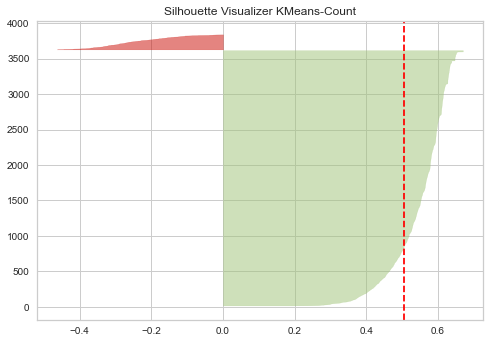

In [34]:
# -1 to +1 
# Silhouette Visualizer
def Silhouette_visualizer(df,model,title1):
    visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(df)
    plt.title(f"Silhouette Visualizer {title1}")
Silhouette_visualizer(bow,bow_kmeans,"KMeans-Count")

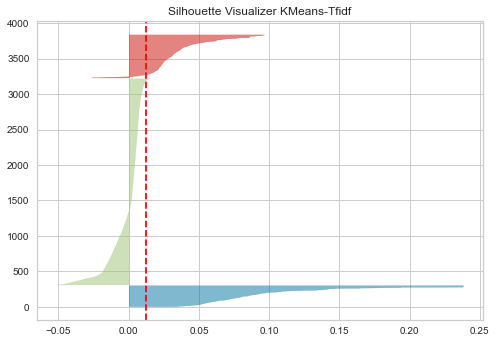

In [35]:
Silhouette_visualizer(tfidf_data,tfidf_kmeans,"KMeans-Tfidf")

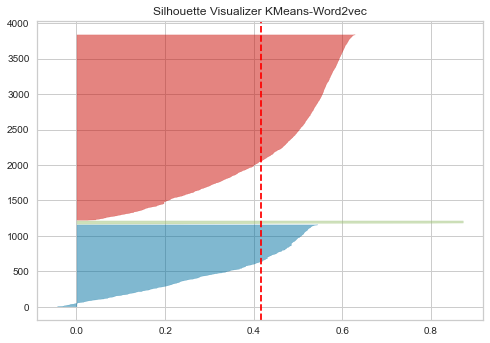

In [36]:
Silhouette_visualizer(x_emb,word2vec_kmeans,"KMeans-Word2vec")

In [37]:
word2vec_pred

array([2, 0, 2, ..., 0, 0, 2])

In [38]:
df["target"]=word2vec_pred

In [47]:
df.COMMENT[3808]     # 0=service is bad   1=service is  good

'Very skeptical that you will soon be without a Dr. and possibly for how long? When I call, nobody ever answers the phone!'

## 0 = service is bad            


## 1 = service is good

In [128]:
df

,ID,MEMBER_ID,COMMENT,target
0,a2p1U000000RowfQAC,0011U00000rjFKdQAM,"I showed up for my appointment, but they had m...",0
1,a2p1U000000RqQqQAK,0011U00000riCSHQA2,"Staff was polite, courteous, and on time",1
2,a2p1U000000RqXyQAK,0011U00000riTw7QAE,Overall care is great! It's wonderful to be a...,0
3,a2p1U000000Rq1LQAS,0011U00000rhu8eQAA,Like the doctor and staff at this location. Ea...,1
4,a2p1U000000RpiuQAC,0011U00000rk4SHQAY,The convenience and the doctors,1
...,...,...,...,...
3807,a2p1U000000Ro6oQAC,0011U00000ripDZQAY,yes,0
3808,a2p1U000000l8JgQAI,0011U00000rhynIQAQ,Very skeptical that you will soon be without a...,0
3809,a2p1U000000RtGrQAK,0011U00000riYJYQA2,"Doctor Malfese is easily accessible, staff is ...",0
3810,a2p1U000000RtKVQA0,0011U00000rhsCkQAI,Friendly Staff that can be reached at any time,1
